In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [50]:
# Loading the dataset
file_path = r"C:\Users\ava\AppData\Local\Temp\30f8c44a-afae-43d3-9c13-3c7d2fc96c96_archive (70)(1).zip.archive (70)(1).zip\Student_performance_10k.csv"
data = pd.read_csv(file_path)
print(data.head())  
data.info()       

  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2           58.0        264.0     B  


In [52]:

data['math_score'] = pd.to_numeric(data['math_score'], errors='coerce')  # 'coerce' will convert invalid parsing to NaN


C:\Users\ava\AppData\Local\Temp\ipykernel_35556\1864690085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='parental_level_of_education', palette='viridis' , hue = None)  # or choose another palette


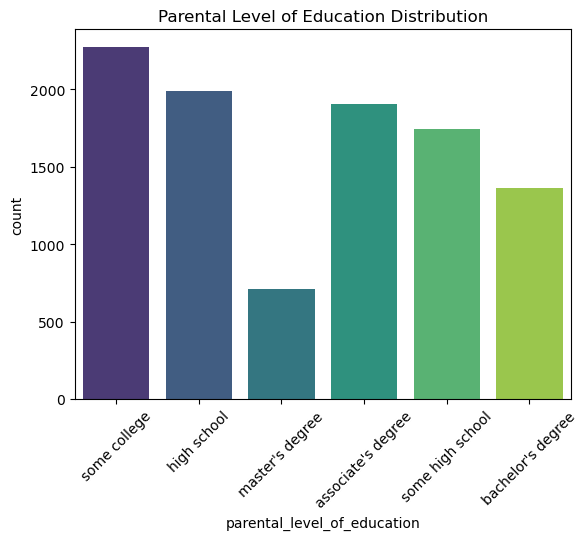

In [28]:
# Plot parental level of education distribution
sns.countplot(data=data, x='parental_level_of_education', palette='viridis' , hue = None)  # or choose another palette
plt.title('Parental Level of Education Distribution')


plt.xticks(rotation=45)

plt.show()

In [56]:

# Displaying unique values of 'gender' column
print(data['gender'].unique())


['male' nan 'Boy' '\\tmale' 'female' 'Girl']


In [58]:
data['gender'] = data['gender'].replace({
    'Boy': 'male', 
    '\\tmale': 'male', 
    'Girl': 'female',
    np.nan: 'unknown'  # Replace nan with 'unknown' or exclude
})

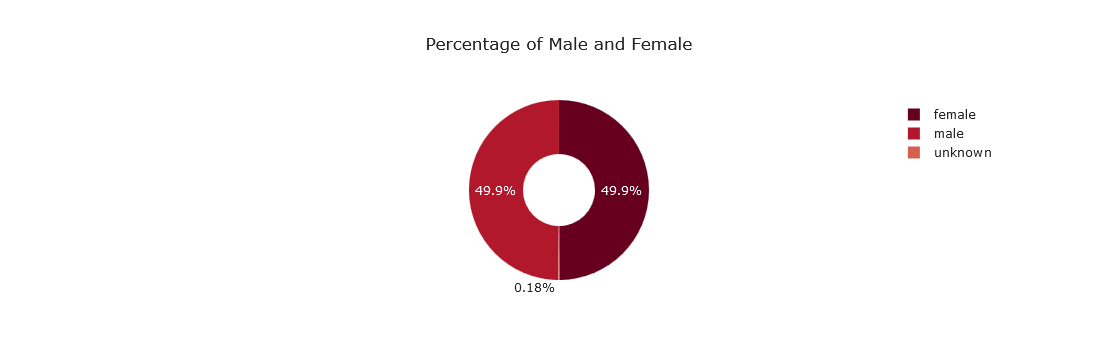

In [62]:
fig = px.pie(data,
            names='gender',  # Use 'gender' column directly instead of df['gender']
            template='seaborn',  # Changed template to 'seaborn'
            color_discrete_sequence=px.colors.sequential.RdBu,
            hole=0.4,
            title='Percentage of Male and Female')

iplot(fig)

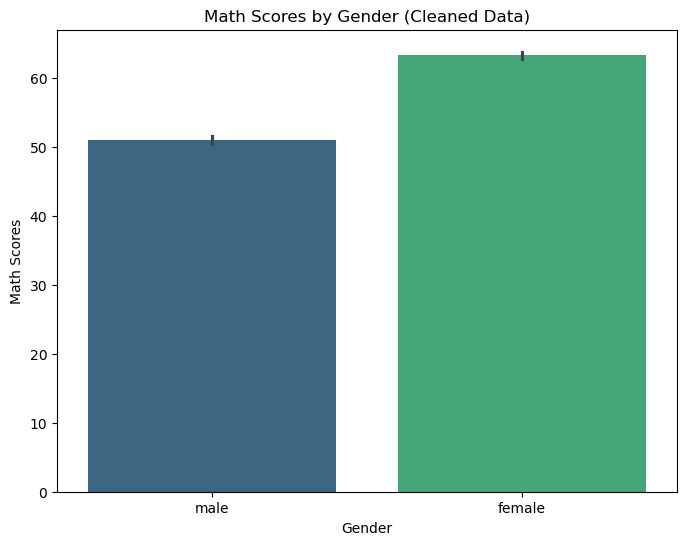

In [94]:
data['gender'] = data['gender'].replace({'Boy': 'male', '\\tmale': 'male', 'Girl': 'female', 'nan': 'female', 'unknown': 'female'})

# Drop rows where 'gender' is NaN or after replacements, drop any remaining unwanted entries
df_cleaned = data.dropna(subset=['gender'])

# Plotting with seaborn (you can now be sure only valid gender levels remain)
plt.figure(figsize=(8, 6))
sns.barplot(data=df_cleaned, x='gender', y='math_score', hue='gender', palette='viridis')

# Adding title and labels
plt.title('Math Scores by Gender (Cleaned Data)')
plt.ylabel('Math Scores')
plt.xlabel('Gender')

# Show the plot
plt.show()

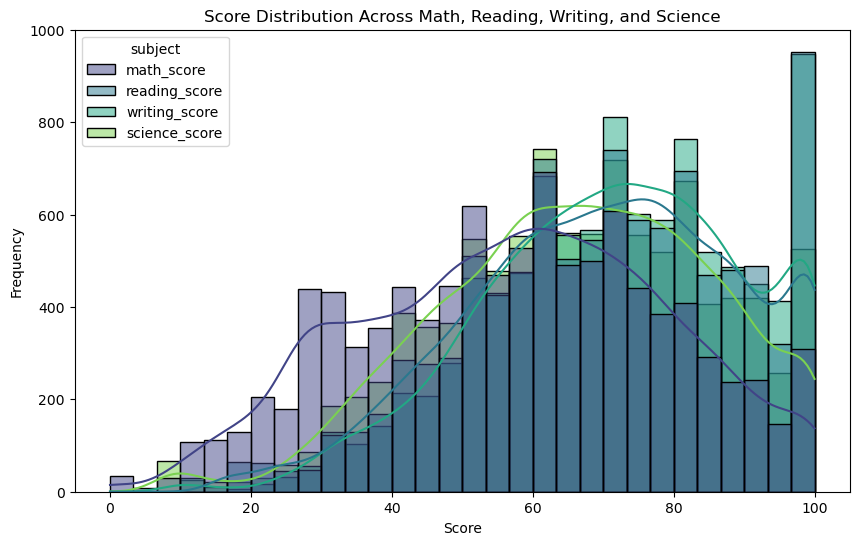

In [107]:
columns_of_interest = ['math_score', 'reading_score', 'writing_score', 'science_score']
data_melted = data[columns_of_interest].melt(var_name='subject', value_name='score')


data_melted['score'] = pd.to_numeric(data_melted['score'], errors='coerce')

# the distribution of math, reading, writing, and science scores
plt.figure(figsize=(10, 6))
sns.histplot(data=data_melted, x='score', hue='subject', kde=True, palette='viridis', bins=30)
plt.title('Score Distribution Across Math, Reading, Writing, and Science')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()